In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#for linear regressor
from sklearn.linear_model import LinearRegression
#for poly features
from sklearn.preprocessing import PolynomialFeatures


In [2]:
dataset=pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [6]:
print("slope(m)=",lin_reg.coef_)
print("intercept(c)=",lin_reg.intercept_)

slope(m)= [80878.78787879]
intercept(c)= -195333.33333333337


In [7]:
poly_reg=PolynomialFeatures(degree=10)
X_poly=poly_reg.fit_transform(X)
print(X_poly)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
  2.56000000e+02 5.12000000e+02 1.02400000e+03]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03
  6.56100000e+03 1.96830000e+04 5.90490000e+04]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02 1.02400000e+03 4.09600000e+03 1.63840000e+04
  6.55360000e+04 2.62144000e+05 1.04857600e+06]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04 7.81250000e+04
  3.90625000e+05 1.95312500e+06 9.76562500e+06]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03 4.66560000e+04 2.79936000e+05
  1.67961600e+06

LinearRegression()

In [8]:
print("slope(bi)=",lin_reg2.coef_)
print("intercept(b0)=",lin_reg2.intercept_)

slope(bi)= [ 5.04223771e+00  1.46820300e+05 -1.30632182e+03 -1.34291025e+05
  1.17468501e+05 -4.93479463e+04  1.21106506e+04 -1.81903985e+03
  1.64592991e+02 -8.23590726e+00  1.75046398e-01]
intercept(b0)= -44796.69244328665


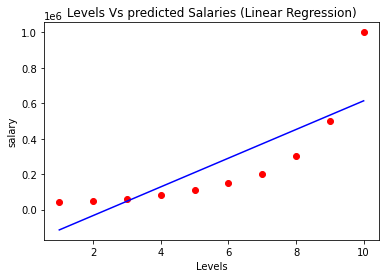

In [9]:
plt.scatter(X,y,color="red")
plt.plot(X,lin_reg.predict(X),color ="blue")
plt.title("Levels Vs predicted Salaries (Linear Regression)")
plt.xlabel('Levels')
plt.ylabel("salary")
plt.show()

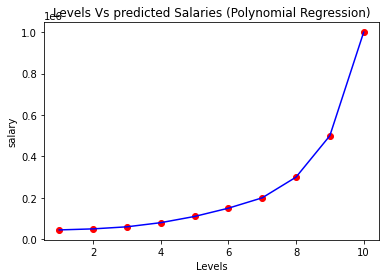

In [10]:
plt.scatter(X,y,color="red")
plt.plot(X,lin_reg2.predict(X_poly),color ="blue")
plt.title("Levels Vs predicted Salaries (Polynomial Regression)")
plt.xlabel('Levels')
plt.ylabel("salary")
plt.show()

for high resolution graph

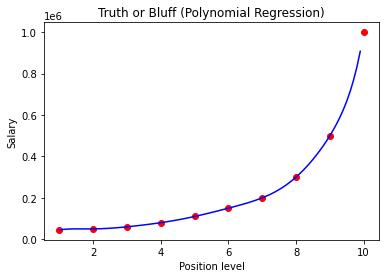

In [11]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [12]:
x=[[6.5],[5]]
lin_reg2.predict(poly_reg.fit_transform(x))

array([172421.91757479, 110000.00022679])

In [13]:
lin_reg.predict([[6.5],[5]])

array([330378.78787879, 209060.60606061])

In [14]:
from sklearn.metrics import r2_score
accu=r2_score(y,lin_reg2.predict(X_poly))
accu*100

100.0